In [1]:
import pandas
import numpy
import seaborn
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Sumber Dataset: https://www.kaggle.com/mirichoi0218/insurance

In [2]:
df = pandas.read_csv("D:\Kuliah\Semester_5\Machine Learning\datasets\insurance.csv")
data = df.copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.drop(['sex', 'smoker', 'region'], axis=1, inplace=True)
df.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [4]:
label = LabelEncoder()
data['sex'] = label.fit_transform(data['sex'])
data['smoker'] = label.fit_transform(data['smoker'])
data['region'] = label.fit_transform(data['region'])
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [5]:
df_scale = df.copy()
df_minMax = df.copy()

scale = StandardScaler()
minMax = MinMaxScaler()

df_scale = scale.fit_transform(df_scale)

df_minMax = minMax.fit_transform(df_minMax)

In [6]:
data_scale = pandas.DataFrame(df_scale)
data_scale.columns = df.columns

data_minMax = pandas.DataFrame(df_minMax)
data_minMax.columns = df.columns

data_scale_cluster = data_scale.copy()
data_minMax_cluster = data_minMax.copy

In [7]:
data_scale.describe()

,age,bmi,children,charges
count,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03
mean,-1.805565e-16,-2.124194e-16,-5.576008e-17,-8.098488e-17
std,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00
min,-1.509965e+00,-2.412011e+00,-9.086137e-01,-1.003557e+00
25%,-8.691547e-01,-7.164063e-01,-9.086137e-01,-7.046504e-01
50%,-1.474046e-02,-4.320880e-02,-7.876719e-02,-3.212089e-01
75%,8.396738e-01,6.611572e-01,7.510793e-01,2.783441e-01
max,1.765289e+00,3.685522e+00,3.240619e+00,4.171663e+00


In [8]:
data_minMax.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,0.461022,0.395572,0.218984,0.193916
std,0.305434,0.164062,0.241099,0.193301
min,0.000000,0.000000,0.000000,0.000000
25%,0.195652,0.278080,0.000000,0.057757
50%,0.456522,0.388485,0.200000,0.131849
75%,0.717391,0.504002,0.400000,0.247700
max,1.000000,1.000000,1.000000,1.000000


# K-Means Clustering

Text(0, 0.5, 'Inertia')

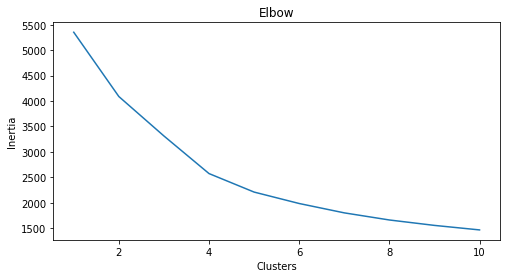

In [9]:
from sklearn.cluster import KMeans

clusters = []
for i in range (1,11):
    km = KMeans(n_clusters=i).fit(data_scale)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(8,4))
seaborn.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [10]:
model_scale_kmeans2 = KMeans(n_clusters=4)

model_scale_kmeans2.fit(data_scale)

data_scale_cluster['cluster_kmeans2'] = model_scale_kmeans2.labels_

c:\users\windows 10\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


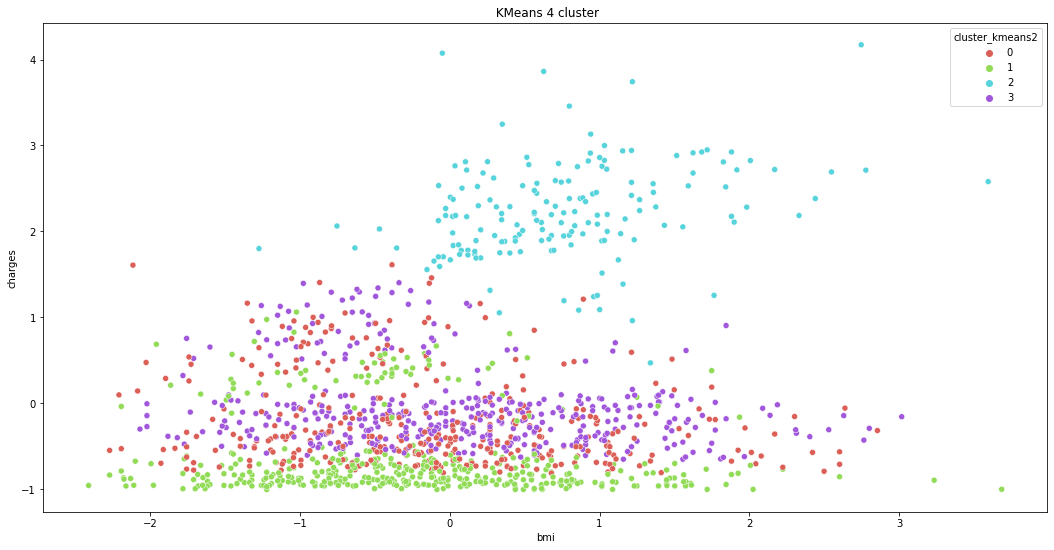

In [11]:
plt.figure(figsize=(18,9))
seaborn.scatterplot(data_scale_cluster['bmi'], 
                data_scale_cluster['charges'], 
                hue=data_scale_cluster['cluster_kmeans2'], 
                palette=seaborn.color_palette('hls',4))
plt.title(' KMeans 4 cluster')

plt.show()

# K-Medoids Clustering

In [12]:
from sklearn_extra.cluster import KMedoids

model_scale_kmedoids4 = KMedoids(n_clusters=4, method='pam', random_state=0).fit(data_scale)
data_scale_cluster['cluster_kmedoids4'] = model_scale_kmedoids4.labels_
data_scale_cluster.head()

,age,bmi,children,charges,cluster_kmeans2,cluster_kmedoids4
0,-1.438764,-0.453320,-0.908614,0.298584,1,3
1,-1.509965,0.509621,-0.078767,-0.953689,1,3
2,-0.797954,0.383307,1.580926,-0.728675,0,1
3,-0.441948,-1.305531,-0.908614,0.719843,1,3
4,-0.513149,-0.292556,-0.908614,-0.776802,1,3


c:\users\windows 10\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


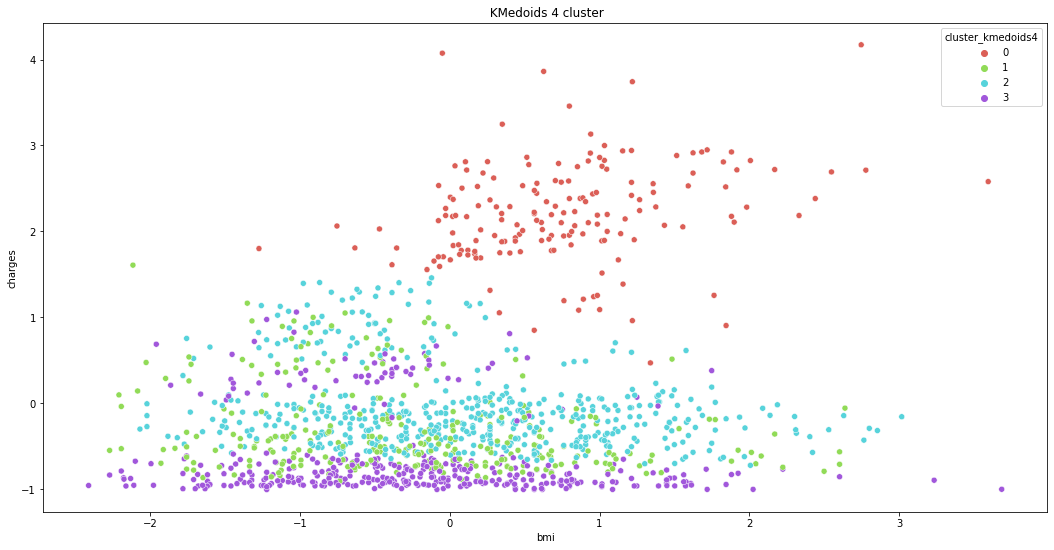

In [13]:
plt.figure(figsize=(18,9))
seaborn.scatterplot(data_scale_cluster['bmi'], 
                data_scale_cluster['charges'], 
                hue=data_scale_cluster['cluster_kmedoids4'], 
                palette=seaborn.color_palette('hls',4))
plt.title(' KMedoids 4 cluster')

plt.show()

# Hirearchial Based Clustering

In [14]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

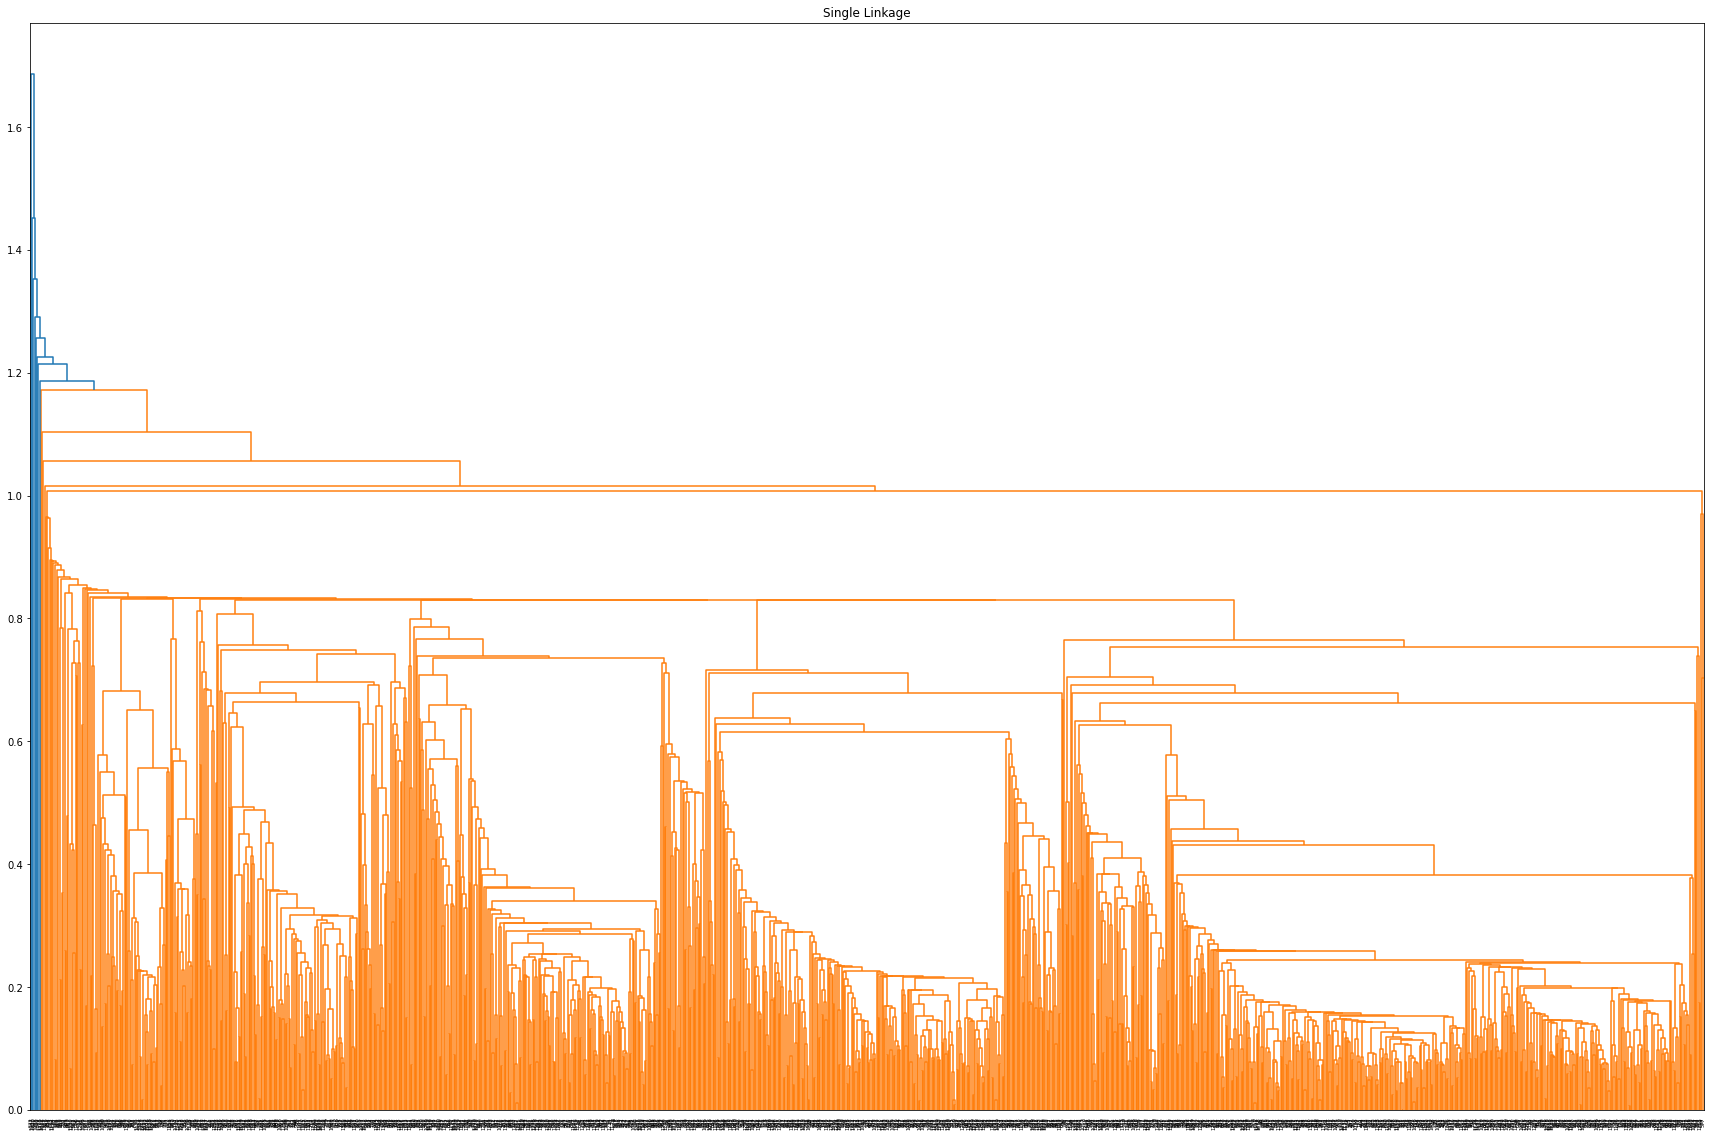

In [27]:
# single linkage
mergings_single = linkage(data_scale, method="single", metric='euclidean')
dendrogram(mergings_single)
plt.title("Single Linkage")
plt.rcParams["figure.figsize"] = (50,25)
plt.show()

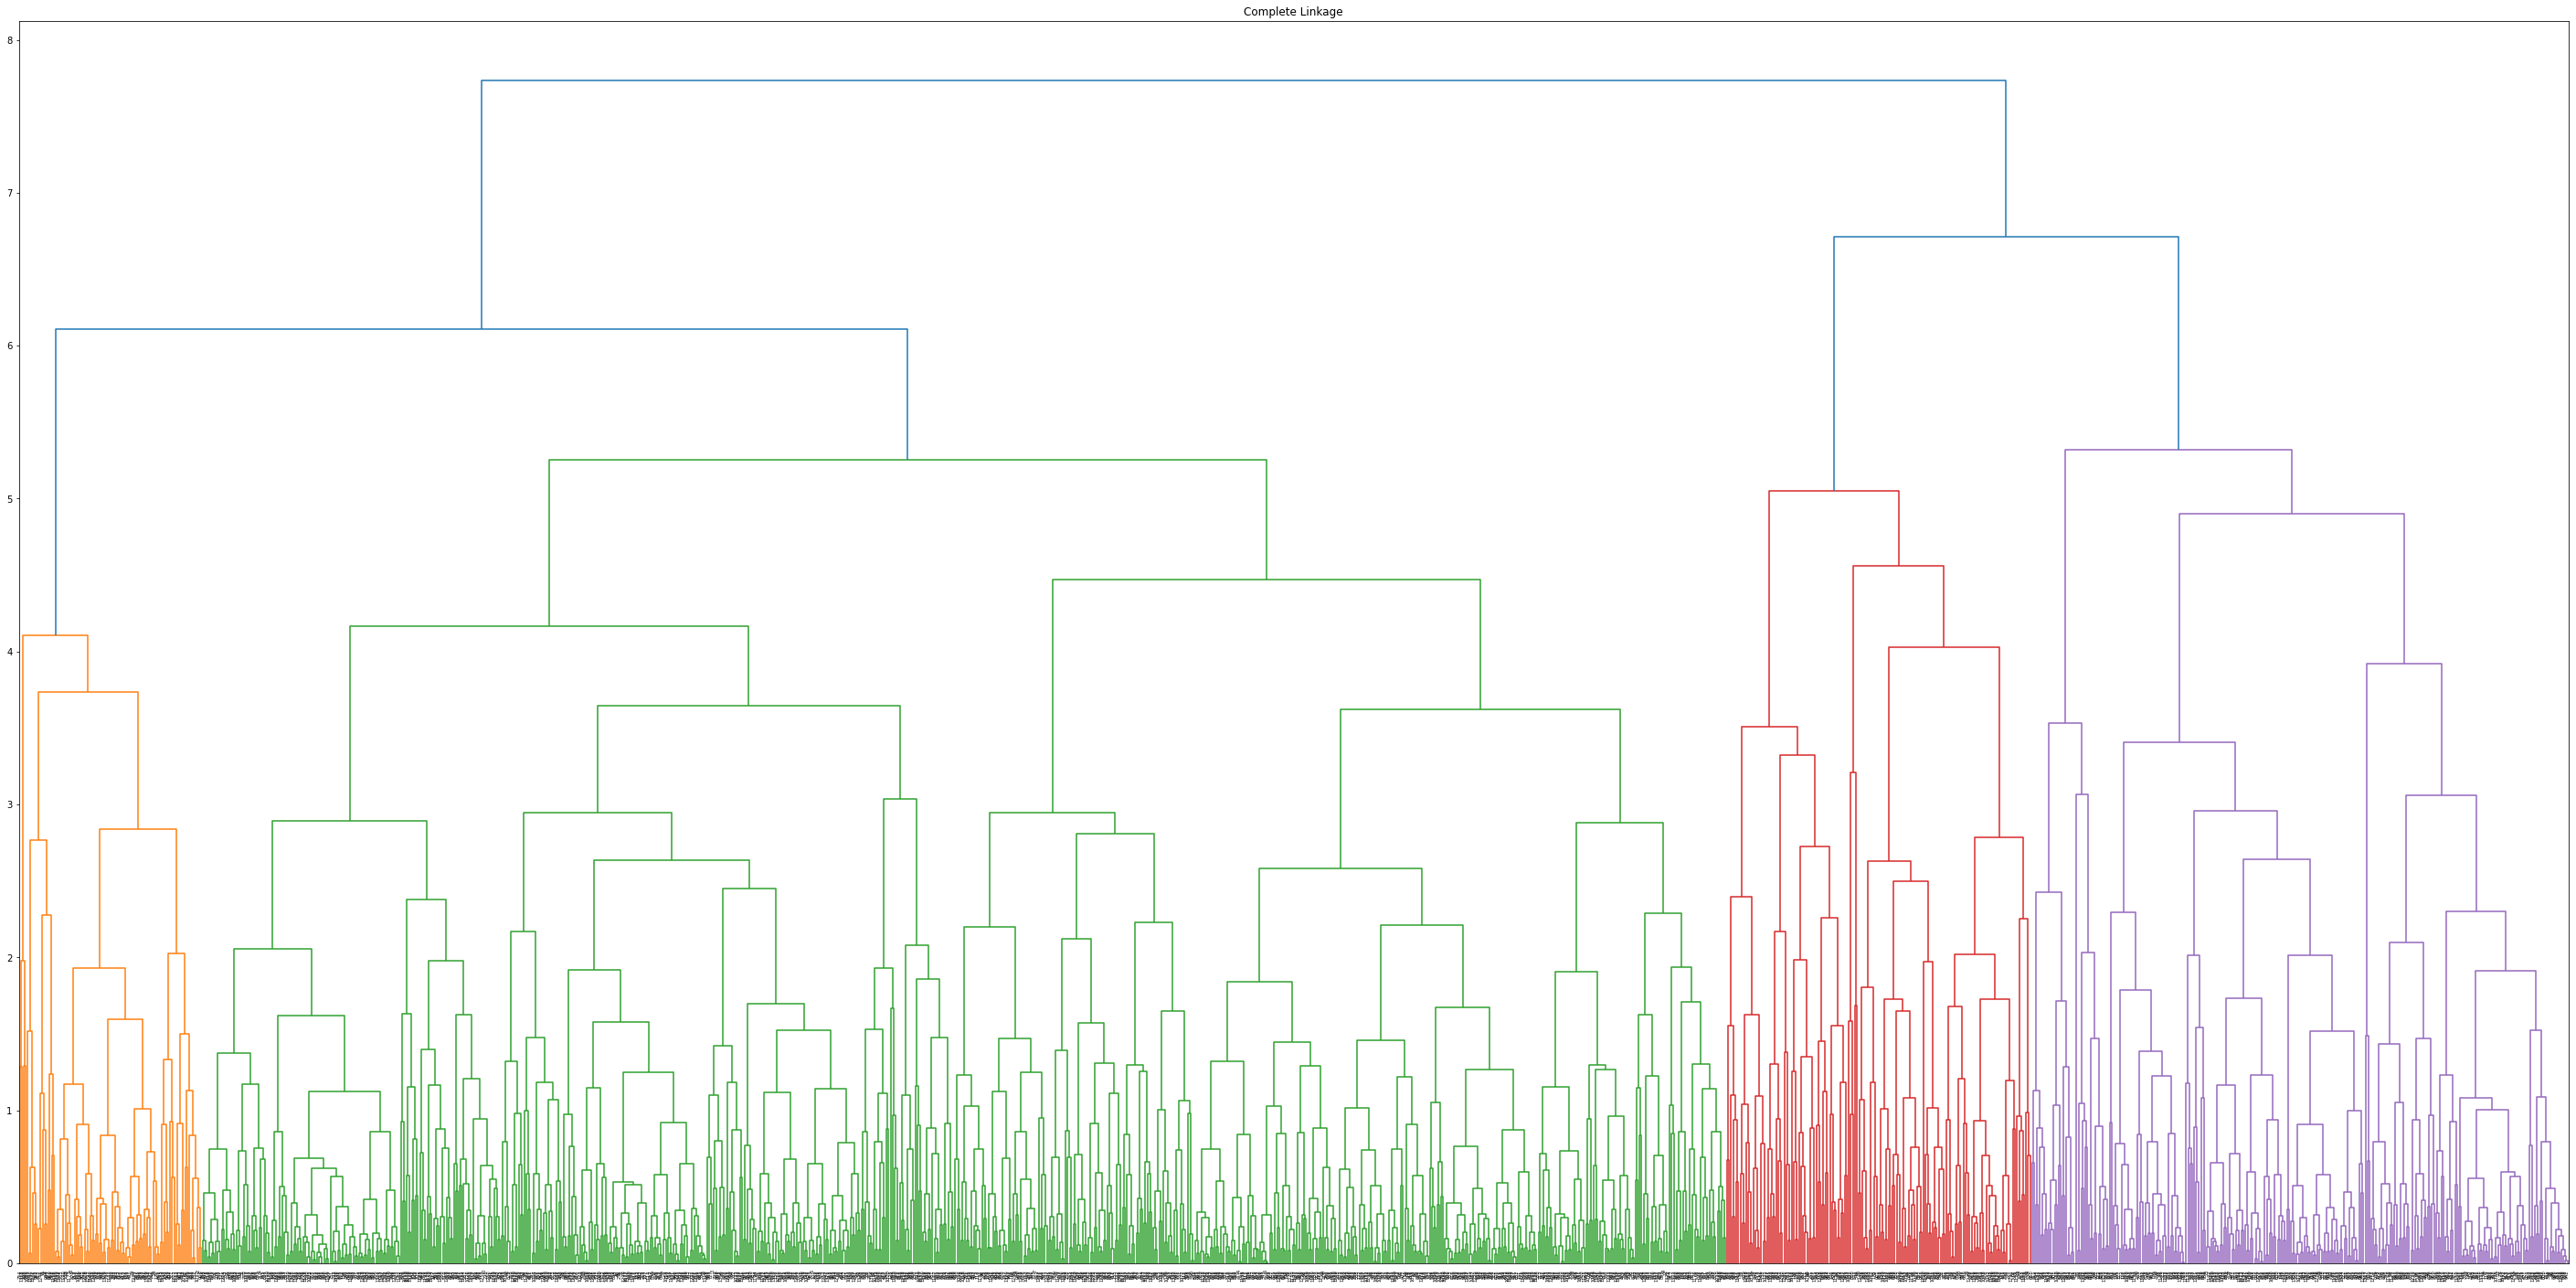

In [16]:
# complete linkage
mergings_complete = linkage(data_scale, method="complete", metric='euclidean')
dendrogram(mergings_complete)
plt.title("Complete Linkage")
plt.rcParams["figure.figsize"] = (30,20)
plt.show()

In [17]:
cluster_hierarchy = cut_tree(mergings_complete, n_clusters=4).reshape(-1, )
cluster_hierarchy

array([0, 0, 1, ..., 2, 0, 0])

In [18]:
data_scale_cluster['cluster_hierarchy'] = cluster_hierarchy
data_scale_cluster

,age,bmi,children,charges,cluster_kmeans2,cluster_kmedoids4,cluster_hierarchy
0,-1.438764,-0.453320,-0.908614,0.298584,1,3,0
1,-1.509965,0.509621,-0.078767,-0.953689,1,3,0
2,-0.797954,0.383307,1.580926,-0.728675,0,1,1
3,-0.441948,-1.305531,-0.908614,0.719843,1,3,0
4,-0.513149,-0.292556,-0.908614,-0.776802,1,3,0
...,...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,-0.220551,0,1,0
1334,-1.509965,0.206139,-0.908614,-0.914002,1,3,0
1335,-1.509965,1.014878,-0.908614,-0.961596,1,3,2
1336,-1.296362,-0.797813,-0.908614,-0.930362,1,3,0


c:\users\windows 10\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


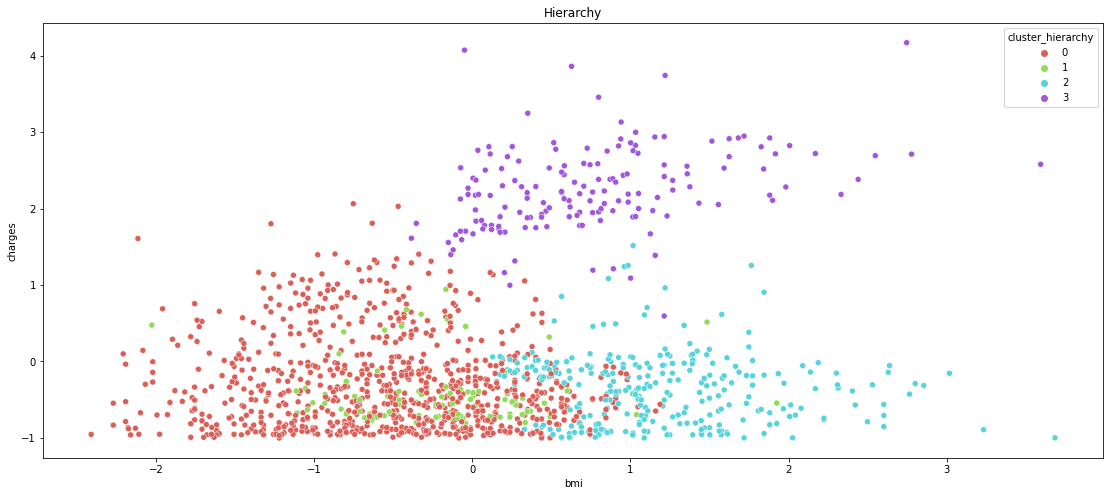

In [19]:
plt.figure(figsize=(19,8))
seaborn.scatterplot(data_scale_cluster['bmi'], 
                data_scale_cluster['charges'], 
                hue=data_scale_cluster['cluster_hierarchy'], 
                palette=seaborn.color_palette('hls',4))
plt.title('Hierarchy')
plt.show()

# Density Based Clustering

In [20]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [21]:
neighbors = NearestNeighbors(n_neighbors=6)
neighbors_fit = neighbors.fit(data_scale)
distances, indices = neighbors_fit.kneighbors(data_scale)

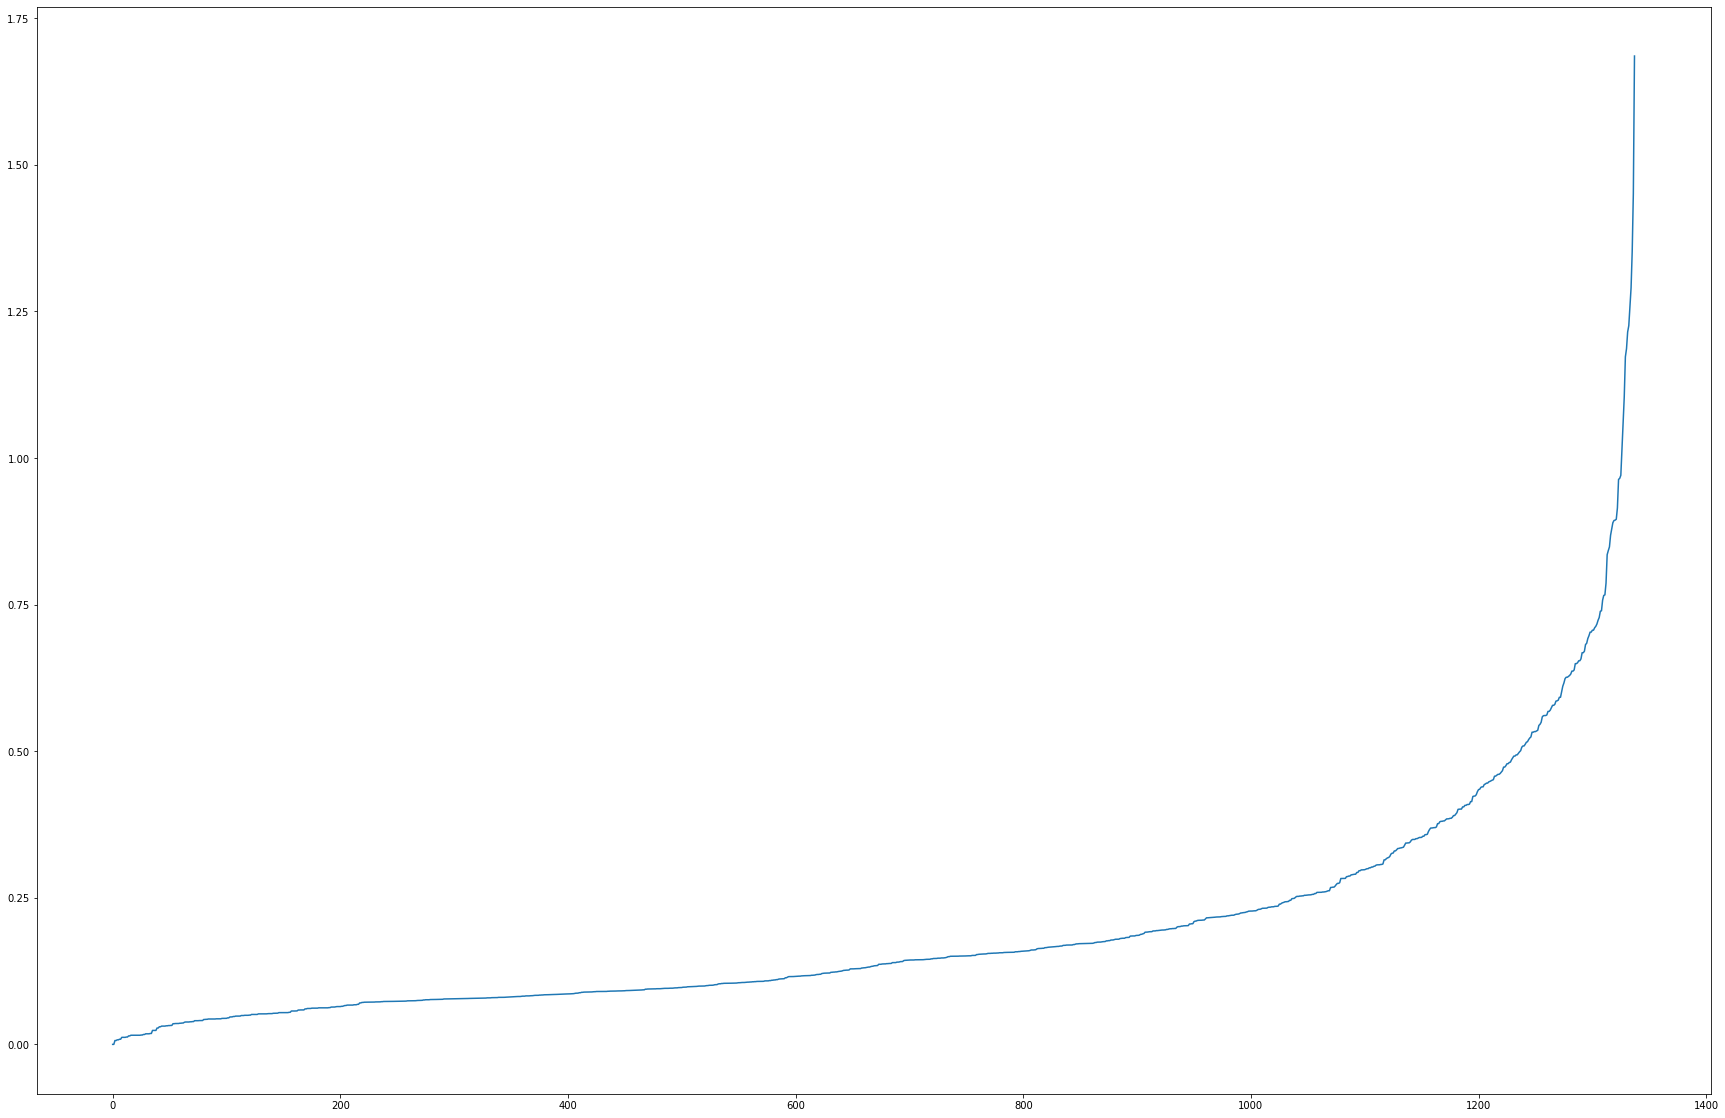

In [22]:
distances = numpy.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [23]:
# create an object
db = DBSCAN(eps=0.6, min_samples=6, metric='euclidean')

# fit the model
db.fit(data_scale)

DBSCAN(eps=0.6, min_samples=6)

In [24]:
data_scale_cluster['cluster_dbscan'] = db.labels_
data_scale_cluster

,age,bmi,children,charges,cluster_kmeans2,cluster_kmedoids4,cluster_hierarchy,cluster_dbscan
0,-1.438764,-0.453320,-0.908614,0.298584,1,3,0,0
1,-1.509965,0.509621,-0.078767,-0.953689,1,3,0,1
2,-0.797954,0.383307,1.580926,-0.728675,0,1,1,2
3,-0.441948,-1.305531,-0.908614,0.719843,1,3,0,0
4,-0.513149,-0.292556,-0.908614,-0.776802,1,3,0,3
...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,-0.220551,0,1,0,2
1334,-1.509965,0.206139,-0.908614,-0.914002,1,3,0,3
1335,-1.509965,1.014878,-0.908614,-0.961596,1,3,2,3
1336,-1.296362,-0.797813,-0.908614,-0.930362,1,3,0,3


In [25]:
data_scale_cluster.describe()

,age,bmi,children,charges,cluster_kmeans2,cluster_kmedoids4,cluster_hierarchy,cluster_dbscan
count,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03,1338.000000,1338.000000,1338.000000,1338.000000
mean,-1.805565e-16,-2.124194e-16,-5.576008e-17,-8.098488e-17,1.474589,1.820628,0.852018,2.663677
std,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00,1.173643,0.984149,1.125186,2.897224
min,-1.509965e+00,-2.412011e+00,-9.086137e-01,-1.003557e+00,0.000000,0.000000,0.000000,-1.000000
25%,-8.691547e-01,-7.164063e-01,-9.086137e-01,-7.046504e-01,0.000000,1.000000,0.000000,1.000000
50%,-1.474046e-02,-4.320880e-02,-7.876719e-02,-3.212089e-01,1.000000,2.000000,0.000000,3.000000
75%,8.396738e-01,6.611572e-01,7.510793e-01,2.783441e-01,3.000000,3.000000,2.000000,3.000000
max,1.765289e+00,3.685522e+00,3.240619e+00,4.171663e+00,3.000000,3.000000,3.000000,15.000000


c:\users\windows 10\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


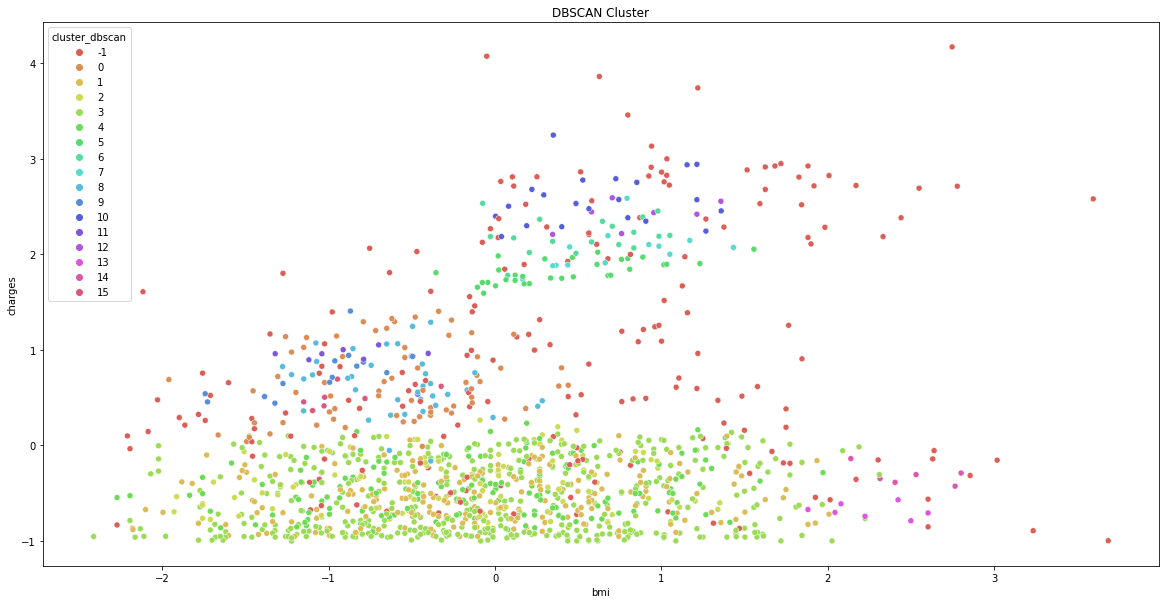

In [26]:
plt.figure(figsize=(20,10))
seaborn.scatterplot(data_scale_cluster['bmi'], 
                data_scale_cluster['charges'], 
                hue=data_scale_cluster['cluster_dbscan'], 
                palette=seaborn.color_palette('hls', 17))
plt.title('DBSCAN Cluster')
plt.show()